<a href="https://colab.research.google.com/github/thk-lightman/FC_300_MLDL/blob/master/Regression_Automated_Used_Car_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 자동으로 모은 데이터는 분석하기 어렵다면서? 자동으로 모은 중고 자동차 데이터를 분석해보자!

- 데이터 출처: https://www.kaggle.com/austinreese/craigslist-carstrucks-data

## 데이터 소개
    - 이번 주제는 Used Cars Dataset을 사용합니다.
    - 파일은 한 개이며, 각각의 컬럼은 아래와 같습니다.
    
    - vehicles.csv
    id : 중고차 거래의 아이디
    url : 중고차 거래 페이지
    region : 해당 거래의 관리 지점
    region_url : 거래 관리 지점의 홈페이지
    price : 기입된 자동차의 거래가
    year : 거래가 기입된 년도
    manufacturer : 자동차를 생산한 회사
    model : 자동차 모델명
    condition : 자동차의 상태
    cylinders : 자동차의 기통 수
    fuel : 자동차의 연료 타입
    odometer : 자동차의 운행 마일 수
    title_status : 자동차의 타이틀 상태 (소유주 등록 상태)
    transmission : 자동차의 트랜스미션 종류
    vin : 자동차의 식별 번호 (vehicle identification number)
    drive : 자동차의 구동 타입
    size : 자동차 크기
    type : 자동차의 일반 타입 (세단, ...)
    paint_color : 자동차 색상
    image_url : 자동차 이미지
    description : 세부 설명
    county : 실수로 생성된 미사용 컬럼
    state : 거래가 업로드된 미 주
    lat : 거래가 업로드된 곳의 위도
    long : 거래가 업로드된 곳의 경도
    

## 최종 목표
    - 스크래핑된 dirty 데이터 클리닝 방법 이해
    - 다양한 종류의 데이터 정규화 방법 습득
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - XGBoost, LightGBM 기반의 모델 학습 방법 습득
    - 학습된 모델의 평가 방법 및 시각화 방법 습득

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


## Step 0. 데이터 스크래핑이 대하여

- 데이터 스크래핑 : 데이터를 긁어모아오는 것
- 역사
  - <단말, 어플리케이션> 
    - interface가 없는 경우(멀티미터): 카메라, OCR
    - interface가 있는 경우: web interface(json, html) > celena, bs4

- 데이터의 형식을 예측 -> 고정적으로 가져오기
- 홈페이지의 데이터가 변동해서 예측이 잘 되지 않으면 잘못 분석될 여지가 큼
- 특징
  - 빈 데이터
  - 아웃라이어
  - 형식이 틀린 경우
    - 문자열: 앞뒤 공백,html태그가 같이 포함,인코딩에 의해 깨진 문자
    - 숫자형: 최대값/최소값으로 잘못 기입, 숫자 대신 문자열

### 스크래핑을 이용한 자동 데이터 습득

### 스크래핑된 데이터에서 아웃라이어의 특징


## Step 1. 데이터셋 준비하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [ ]:
# import os

In [ ]:
# # os.environ을 이용하여 Kaggle API Username, Key 세팅하기
# os.environ['KAGGLE_USERNAME'] = 'fastcampuskim'
# os.environ['KAGGLE_KEY'] = 'c939a1e37f5ca93b6406a66fc8bb08e5'

### 문제 2. 데이터 다운로드 및 압축 해제하기


In [ ]:
# # Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# # Linux 명령어로 압축 해제하기
# !rm *.*
# !kaggle datasets download -d austinreese/craigslist-carstrucks-data
# !unzip '*.zip'

rm: cannot remove '*.*': No such file or directory
 93% 249M/267M [00:02<00:00, 108MB/s]
100% 267M/267M [00:02<00:00, 131MB/s]
Archive:  craigslist-carstrucks-data.zip
  inflating: vehicles.csv            


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


- 데이터가 크면 RAM이 쉽게 가득차서 세션이 뻗을 수 있다. 주의해야한다!

In [121]:
df = pd.read_csv('/content/drive/MyDrive/[Data Science]/[FC] 300/후보군/[회귀] 1 자동으로 모은 데이터는 분석하기 어렵다면서_ 자동으로 모은 중고 자동차 데이터를 분석해보자!/vehicles.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 4. 불필요한 데이터 데이터프레임에서 제거하기


In [ ]:
# DataFrame에서 제공하는 메소드를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info(), describe())
# 데이터프레임에서 불필요한 컬럼 제거하기
# 'year' 컬럼을 'age' 컬럼으로 변경하기
df.head()

#[★] description 자연어 처리를 이용해서 feature로 활용!!


,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,1G1YU3DW1A5106980,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,5NPEC4AB0EH813529,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,NaN,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,NaN,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


In [ ]:
df.info()
#[★] df.info > dtype / 명목형, 순서형, 수치형으로 나눠놓기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [ ]:
df.isnull().sum()
#[★]비어있는 열을 버릴거냐? 행을 버릴거냐 ?
#condition, size, paint.. 

Unnamed: 0           0
id                   0
url                  0
region               0
region_url           0
price                0
year              1050
manufacturer     18220
model             4846
condition       192940
cylinders       171140
fuel              3237
odometer         55303
title_status      2577
transmission      2442
VIN             187549
drive           134188
size            321348
type            112738
paint_color     140843
image_url           28
description         70
state                0
lat               7448
long              7448
posting_date        28
dtype: int64

In [ ]:
df.describe()
#[★] df.describe > 아웃라이어 체크 : 평균과 최대 최소 비교 ~

,Unnamed: 0,id,price,year,odometer,lat,long
count,458213.000000,4.582130e+05,4.582130e+05,457163.000000,4.029100e+05,450765.000000,450765.000000
mean,229106.000000,7.235233e+09,4.042093e+04,2010.746067,1.016698e+05,38.531925,-94.375824
std,132274.843786,4.594362e+06,8.194599e+06,8.868136,3.228623e+06,5.857378,18.076225
min,0.000000,7.208550e+09,0.000000e+00,1900.000000,0.000000e+00,-82.607549,-164.091797
25%,114553.000000,7.231953e+09,4.900000e+03,2008.000000,4.087700e+04,34.600000,-110.890427
50%,229106.000000,7.236409e+09,1.099500e+04,2013.000000,8.764100e+04,39.244500,-88.314889
75%,343659.000000,7.239321e+09,2.149500e+04,2016.000000,1.340000e+05,42.484503,-81.015022
max,458212.000000,7.241019e+09,3.615215e+09,2021.000000,2.043756e+09,82.049255,150.898969


In [ ]:
df.columns

Index(['Unnamed: 0', 'id', 'url', 'region', 'region_url', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'VIN', 'drive', 'size', 'type',
       'paint_color', 'image_url', 'description', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

In [123]:
df.drop(['Unnamed: 0', 'id', 'url', 'region_url', 'VIN',
         'image_url', 'description', 'state', 'lat', 
         'long', 'posting_date'], axis=1, inplace=True)

In [122]:
df['age'] = 2021 - df['year']
df.drop('year', axis=1, inplace=True)

In [ ]:
df

,region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,age
0,auburn,35990,chevrolet,corvette grand sport,good,8 cylinders,gas,32742.0,clean,other,rwd,NaN,other,NaN,11.0
1,auburn,7500,hyundai,sonata,excellent,4 cylinders,gas,93600.0,clean,automatic,fwd,NaN,sedan,NaN,7.0
2,auburn,4900,bmw,x3 3.0i,good,6 cylinders,gas,87046.0,clean,automatic,NaN,NaN,SUV,blue,15.0
3,auburn,2000,chevrolet,c-10,good,4 cylinders,gas,190000.0,clean,automatic,rwd,full-size,pickup,blue,47.0
4,auburn,19500,ford,f350 lariat,excellent,8 cylinders,diesel,116000.0,lien,automatic,4wd,full-size,pickup,blue,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458208,wausau,14995,cadillac,srx,excellent,6 cylinders,gas,83790.0,clean,automatic,4wd,mid-size,SUV,silver,7.0
458209,wausau,17895,hyundai,tucson,excellent,4 cylinders,gas,31888.0,clean,automatic,4wd,mid-size,SUV,white,3.0
458210,wyoming,17900,cadillac,cts coupe awd,excellent,6 cylinders,gas,53000.0,clean,automatic,4wd,mid-size,coupe,black,7.0
458211,wyoming,1300,jeep,grand cherokee,good,8 cylinders,gas,164000.0,clean,automatic,4wd,mid-size,SUV,white,13.0


### 문제 5. 범주형 데이터의 통계 분석하기
- 10개 카테고리 이상 : 적은 라벨로 바꾸기
- 10개 카테고리 미만 : OneHotEncoding
- countplot
  - object형인 자료
  - object형이라도 id적인 특성을 나타내는건 볼 필요 없음
  - 수치형이라도 개수가 적은 자료: 어떻게 변환하고 묶을까
  

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

In [ ]:
# 범주형 데이터의 값의 범위, 기초 통계 분석하기
len(df['manufacturer'].value_counts())

43

In [ ]:
df['manufacturer'].value_counts()

ford               79666
chevrolet          64977
toyota             38577
honda              25868
nissan             23654
jeep               21165
ram                17697
gmc                17267
dodge              16730
bmw                12352
hyundai            10975
mercedes-benz      10628
subaru             10510
volkswagen         10489
kia                 8854
chrysler            7499
lexus               7119
cadillac            6743
buick               6009
mazda               5931
audi                5583
acura               4008
infiniti            3714
lincoln             3338
pontiac             3037
volvo               2866
mini                2330
mitsubishi          2301
porsche             1779
rover               1662
mercury             1645
saturn              1393
tesla               1067
jaguar              1060
fiat                 955
alfa-romeo           187
harley-davidson      139
ferrari               96
datsun                63
aston-martin          35


- 범주형 데이터 분포 : countplot
  - 소수 카테고리로 어떻게 묶을까 ?

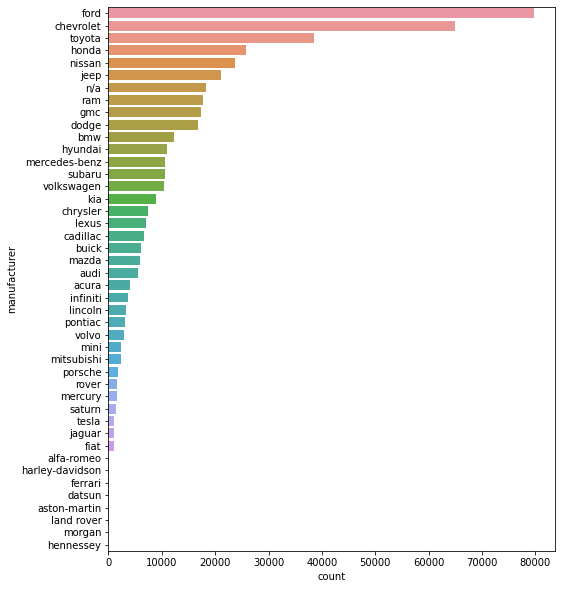

In [ ]:
fig = plt.figure(figsize=(8, 10))
# sns.countplot(y='manufacturer', data = df.fillna('n/a'))
sns.countplot(y='manufacturer', data=df.fillna('n/a'), order=df.fillna('n/a')['manufacturer'].value_counts().index)

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

In [ ]:
for model, num in zip(df['model'].value_counts().index, df['model'].value_counts()):
  print(model, num)

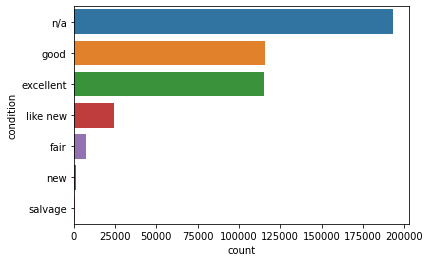

In [ ]:
sns.countplot(y='condition', data=df.fillna('n/a'), order=df.fillna('n/a')['condition'].value_counts().index)

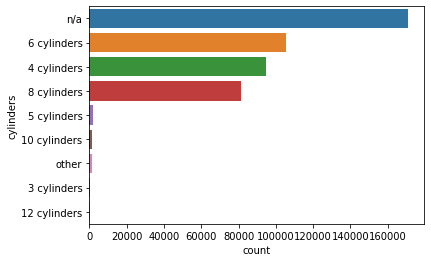

In [ ]:
sns.countplot(y='cylinders', data=df.fillna('n/a'), order=df.fillna('n/a')['cylinders'].value_counts().index)

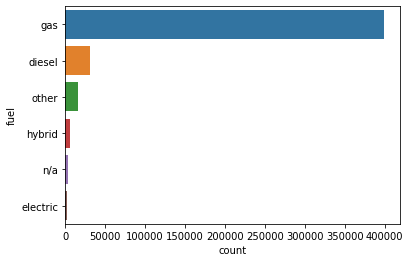

In [ ]:
sns.countplot(y='fuel', data=df.fillna('n/a'), order=df.fillna('n/a')['fuel'].value_counts().index)

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

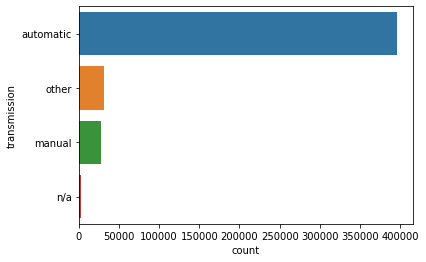

In [ ]:
sns.countplot(y='transmission', data=df.fillna('n/a'), order=df.fillna('n/a')['transmission'].value_counts().index)

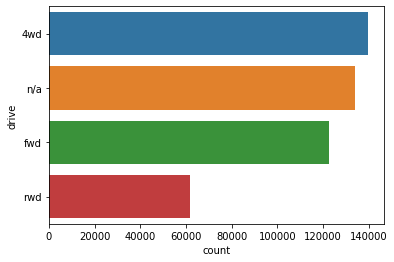

In [ ]:
sns.countplot(y='drive', data=df.fillna('n/a'), order=df.fillna('n/a')['drive'].value_counts().index)

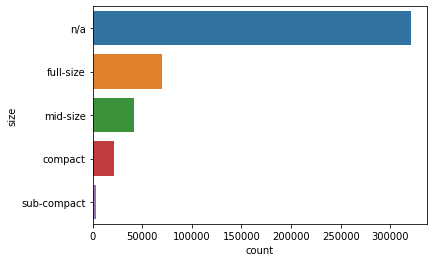

In [ ]:
sns.countplot(y='size', data=df.fillna('n/a'), order=df.fillna('n/a')['size'].value_counts().index)

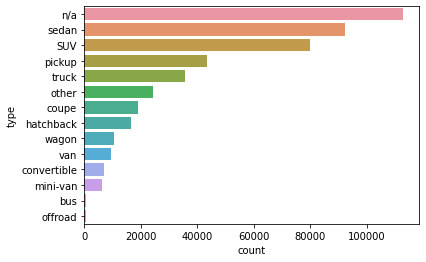

In [ ]:
sns.countplot(y='type', data=df.fillna('n/a'), order=df.fillna('n/a')['type'].value_counts().index)

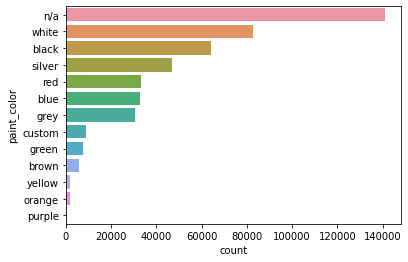

In [ ]:
sns.countplot(y='paint_color', data=df.fillna('n/a'), order=df.fillna('n/a')['paint_color'].value_counts().index)

### 문제 6. 수치형 데이터의 통계 분석하기
- histplot, boxplot, rugplot
- 너무 극단값이 많다 -> 해석하기, 제외하기

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

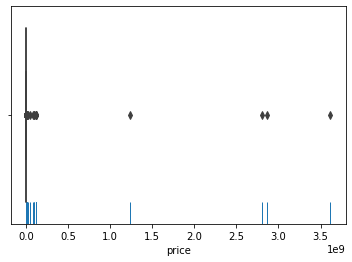

In [ ]:
sns.boxplot(x='price', data = df)
# boxplot으로 아무것도 안보이게 아웃라이어가 극단적일때
sns.rugplot(x='price', data = df, height=0.1)

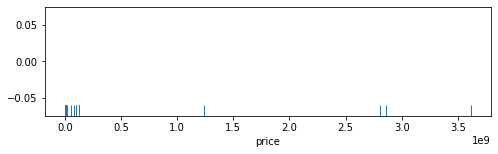

In [ ]:
# 수치형 데이터의 값의 범위, 기초 통계 분석하기
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='price', data=df, height=0.1)

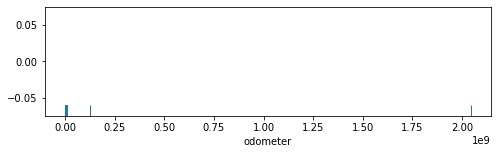

In [ ]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='odometer', data=df, height=0.1)

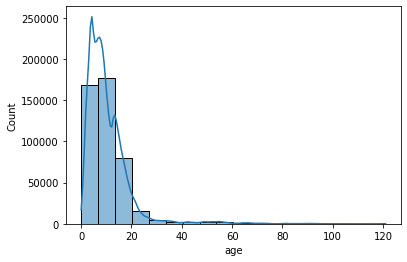

In [ ]:
sns.histplot(x='age', data=df, bins=18, kde=True)

## Step 3. 데이터 클리닝 수행하기

### 문제 7. 범주형 데이터 시각화하여 분석하기

In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

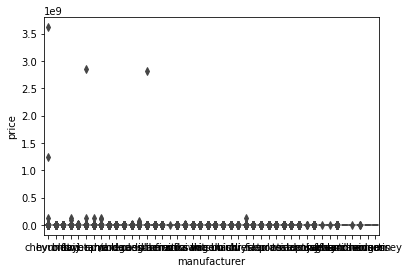

In [ ]:
# Boxplot 계열로 범주형 데이터를 시각화하여 분석하기
sns.boxplot(x='manufacturer', y='price', data=df.fillna('n/a'))

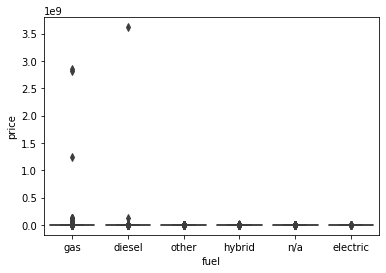

In [ ]:
sns.boxplot(x='fuel', y='price', data=df.fillna('n/a'))

### 문제 8. 범주형 데이터 클리닝하기

In [38]:
# [★] 범주형 데이터를 아래 방법 중 적절히 판단하여 처리하기
# 1. 결손 데이터가 포함된 Row를 제거
# 2. 결손 데이터를 others 범주로 변경하기
# 3. 지나치게 소수로 이루어진 범주를 others 범주로 변경하기
# (4. Classifier를 학습해서, 결손 데이터를 추정하여 채워넣기)
# 5. 데이터를 묶기

In [41]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'age'],
      dtype='object')

3 4


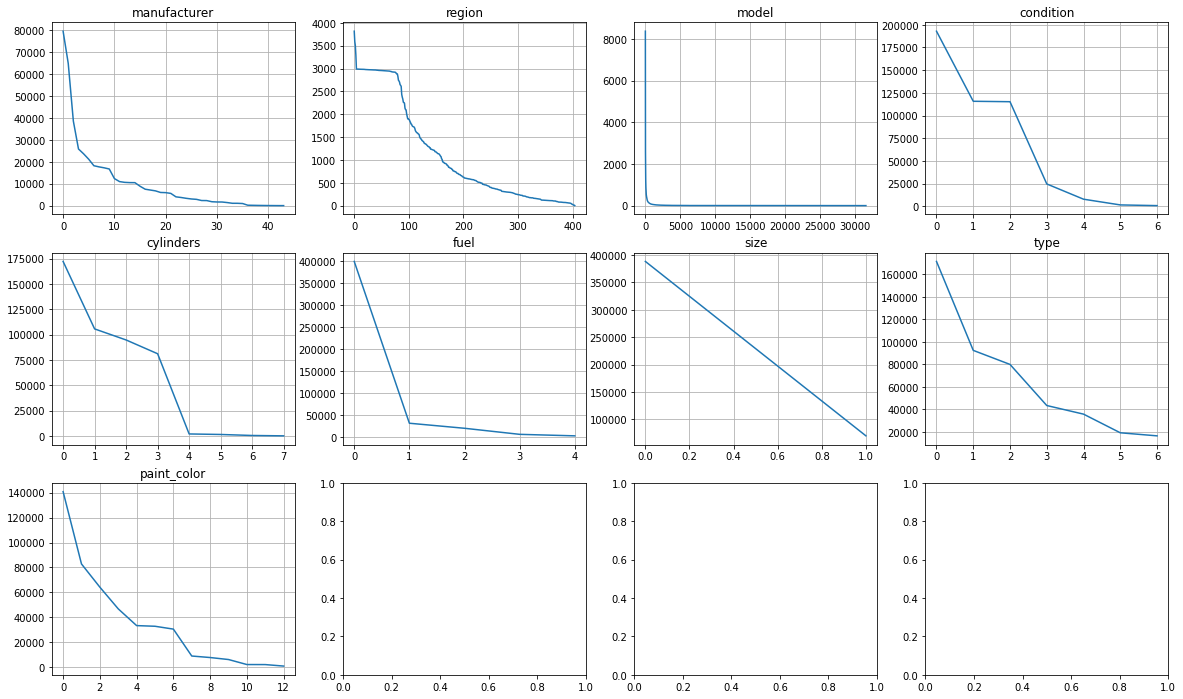

white     82786
black     64145
silver    46722
red       33274
blue      32746
grey      30455
custom     8843
green      7631
brown      6028
yellow     2002
Name: paint_color, dtype: int64

In [139]:
cols = ['manufacturer', 'region', 'model', 'condition', 'cylinders', 'fuel', 'size', 'type', 'paint_color']
nrows = (len(cols)-1) // 4 + 1
ncols = len(cols) % 4 if len(cols) < 4 else 4
print(nrows, ncols)
fig, axes = plt.subplots(nrows, ncols, figsize = (20, 4*nrows))
for col, ax in zip(cols, axes.flatten()):
  # if col == 'manufacturer' :
  #   continue
  counts = df[col].fillna('others').value_counts()
  ax.plot(range(len(counts)), counts)
  ax.set_title(col)
  ax.grid()
plt.show()
#title_status: 버림, transmission: other->others, drvie: 그대로 두기

display(df[col].value_counts()[:10])
# df.drop('title_status', axis =1, inplace = True)

In [145]:
#[★] 범주형 데이터
## 범주 개수 줄이기(상위 n개 남기고 버리기)
## 범주 카테고리화 하기(수치형, 범주형 공통)
n_categoricals = [10, 5, 10, 3, 4, 2, 2, 8, 7]
for col, n_categorical in zip(cols, n_categoricals):
  print('###', col, '###')
  counts = df[col].fillna('others').value_counts()
  others = counts.index[n_categorical:]
  df[col] = df[col].apply(lambda s: s if str(s) not in others else 'others')
  df[col] = df[col].fillna('others')
  display(df[col].value_counts())
  print('#####################')

### manufacturer ###


others       152612
ford          79666
chevrolet     64977
toyota        38577
honda         25868
nissan        23654
jeep          21165
ram           17697
gmc           17267
dodge         16730
Name: manufacturer, dtype: int64

#####################
### region ###


others          441016
columbus          3818
rochester         3592
jacksonville      3504
springfield       3293
fayetteville      2990
Name: region, dtype: int64

#####################
### model ###


others            418402
f-150               8370
silverado 1500      5964
1500                4211
camry               4033
accord              3730
altima              3490
civic               3479
escape              3444
silverado           3090
Name: model, dtype: int64

#####################
### condition ###


others       227322
good         115685
excellent    115206
Name: condition, dtype: int64

#####################
### cylinders ###


others         176590
6 cylinders    105677
4 cylinders     94767
8 cylinders     81179
Name: cylinders, dtype: int64

#####################
### fuel ###


gas       399399
diesel     31077
others     27737
Name: fuel, dtype: int64

#####################
### size ###


others       388477
full-size     69736
Name: size, dtype: int64

#####################
### type ###


others       171436
sedan         92364
SUV           79882
pickup        43343
truck         35694
coupe         19106
hatchback     16388
Name: type, dtype: int64

#####################
### paint_color ###


others    168085
white      82786
black      64145
silver     46722
red        33274
blue       32746
grey       30455
Name: paint_color, dtype: int64

#####################


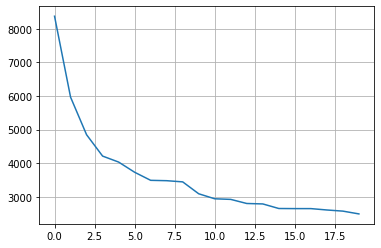

In [98]:
#참고: models
plt.plot(range(len(counts[:20])), counts[:20])
plt.grid()

In [146]:
df['transmission'] = df['transmission'].map(lambda x: 'others' if str(x) == 'other' else x)

In [147]:
df['drive'] = df['drive'].fillna('others')
df['drive'].value_counts()

4wd       139693
others    134188
fwd       122602
rwd        61730
Name: drive, dtype: int64

In [148]:
# df['type'] = df['type'].map(lambda x : 'others' if str(x) == 'other' else x)
df['type'][df['type'] == 'other'] = 'others'
df['type'] = df['type'].fillna('others')
df['type'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


others       171436
sedan         92364
SUV           79882
pickup        43343
truck         35694
coupe         19106
hatchback     16388
Name: type, dtype: int64

### 문제 9. 수치형 데이터 시각화하여 분석하기

In [ ]:
# Seaborn을 이용하여 범주형 데이터를 시각화하여 분석하기
# Hint) 값의 범위가 너무 넓을 경우 histplot() 등이 잘 동작하지 않으므로, rugplot을 활용

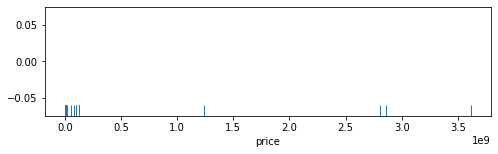

In [149]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='price', data=df, height=.1)

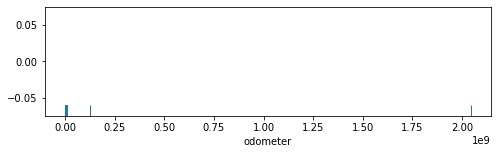

In [150]:
fig = plt.figure(figsize=(8, 2))
sns.rugplot(x='odometer', data=df, height=.1)

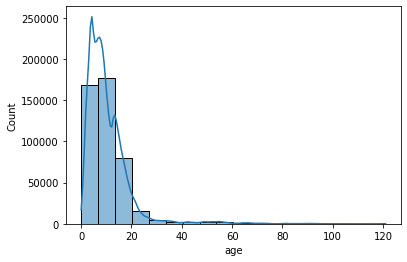

In [151]:
sns.histplot(x='age', data=df, bins=18, kde=True)

### 문제 10. 수치형 데이터 클리닝하기

In [158]:
# [★] quantile() 메소드를 이용하여 outlier 제거하고 시각화하여 확인하기
p1 = df['price'].quantile(0.99)
p2 = df['price'].quantile(0.1)
print(p1, p2)

59900.0 651.0


In [159]:
df = df[(p1 > df['price']) & (df['price'] > p2)]

In [161]:
o1 = df['odometer'].quantile(0.99)
o2 = df['odometer'].quantile(0.1)
print(o1, o2)

272803.10999999824 18593.0


In [162]:
df = df[(o1 > df['odometer']) & (df['odometer'] > o2)]

In [163]:
df.describe()
#mean과 median이 가까워 지면서 Gaussian에 가까워짐


,price,odometer,age
count,322166.000000,322166.000000,321666.000000
mean,15211.239072,103341.828089,10.220235
std,11248.543565,55049.524247,7.071633
min,652.000000,18596.000000,0.000000
25%,6500.000000,57454.000000,6.000000
50%,12000.000000,98850.000000,9.000000
75%,20990.000000,141000.000000,13.000000
max,59895.000000,272742.000000,121.000000


In [ ]:
df.columns

Index(['region', 'price', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'age'],
      dtype='object')

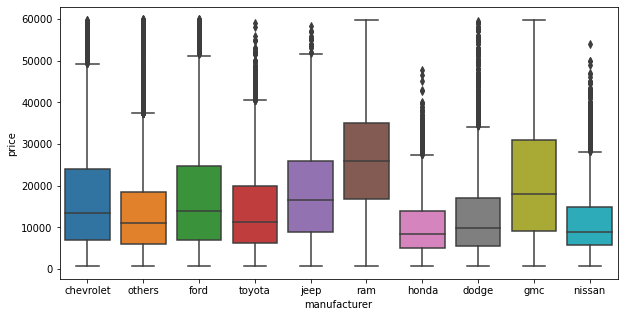

In [199]:
# Boxplot 계열로 범주형 데이터를 시각화하여 분석하기
fig = plt.figure(figsize=(10, 5))
sns.boxplot(x='manufacturer', y='price', data=df)

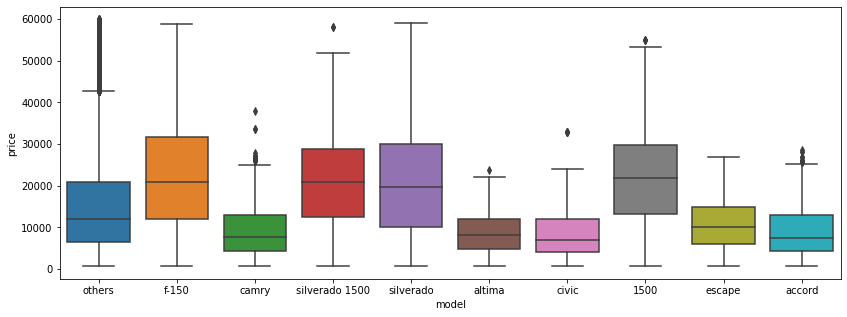

In [165]:
#[★][해석] 모델별로 저가형 고가형으로 나눌 수 있겠구나
fig = plt.figure(figsize=(14, 5))
sns.boxplot(x='model', y='price', data=df)

### 문제 11. 컬럼간의 Correlation Heatmap으로 시각화하기

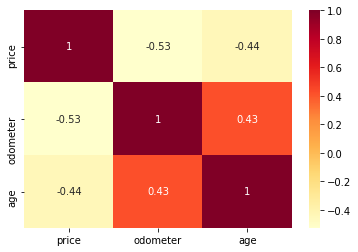

In [171]:
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd')
#[★][해석]age와 price, odo와 price의 상관이 높아서 좋았지만
#안타깝게도 age와 odmeter의 상관이 높으므로 둘은 독립이 아닐 가능성이 높음, 이건 내가 바라는 상태가 아니야

## Step 4. 모델 학습을 위한 데이터 전처리 

### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기


In [172]:
# [★] 수치형, 범주형 데이터 표준화 눈감고도 하기
from sklearn.preprocessing import StandardScaler

In [174]:
# [★] StandardScaler를 이용해 수치형 데이터를 표준화하기
X_num = df[['odometer', 'age']]
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index = X_num.index, columns = X_num.columns)

In [175]:
# [★] get_dummies를 이용해 범주형 데이터를 one-hot 벡터로 변경하기
X_cat = df.drop(['price', 'odometer', 'age'], axis = 1)
X_cat = pd.get_dummies(X_cat)
# [★] Linear Regression 하려면 drop_first 해줘야함!!!

In [176]:
# [★] 입출력 데이터 통합하기
X = pd.concat([X_scaled, X_cat], axis = 1)
y = df['price']

In [ ]:
X.shape

(324382, 62)

In [180]:
X.isnull().sum()

odometer               0
age                    0
region_columbus        0
region_fayetteville    0
region_jacksonville    0
                      ..
paint_color_grey       0
paint_color_others     0
paint_color_red        0
paint_color_silver     0
paint_color_white      0
Length: 67, dtype: int64

In [179]:
X.fillna(0.0, inplace=True)

### 문제 13. 학습데이터와 테스트데이터 분리하기


In [183]:
from sklearn.model_selection import train_test_split

In [184]:
# [★] train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Step 5. Regression 모델 학습하기

### 문제 14. XGBoost Regression 모델 학습하기

In [185]:
from xgboost import XGBRegressor

In [186]:
# XGBRegressor 모델 생성/학습
model_reg = XGBRegressor()
model_reg.fit(X_train, y_train)

[14:11:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### 문제 15. 모델 학습 결과 평가하기

In [187]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

In [189]:
# [★] Predict를 수행하고 mean_absolute_error, rmse 결과 출력하기(단위는 원래 주어진 $, 오차가 꽤 크구나)
pred = model_reg.predict(X_test)
print(mean_absolute_error(y_test, pred))
print(sqrt(mean_squared_error(y_test, pred)))

3772.2779469238535
5597.802335491176


## Step 6. 모델 학습 결과 심화 분석하기


### 문제 16. 실제 값과 추측 값의 Scatter plot 시각화하기


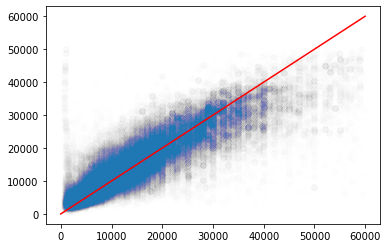

In [ ]:
# [★] y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
# Hint) Scatter로 시각적 확인이 어려울 경우, histplot 등 활용
plt.scatter(x=y_test, y=pred, alpha=0.005)
plt.plot([0,60000], [0,60000], 'r-')
#[★][해석] 차 값이 싼데 비싸다고 예측하는경우, 차 값이 비싼 경우 실제값보다 더 싸게 underestimate 하네

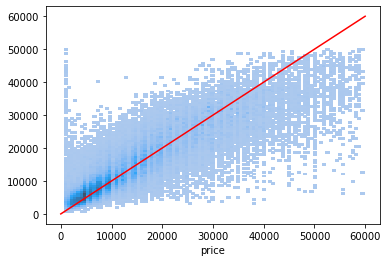

In [ ]:
#[★] histplot으로 scatterplot을 표현할 수 있네. 그러면 좀 더 보기가 편하네
sns.histplot(x=y_test, y=pred)
plt.plot([0, 60000], [0, 60000], 'r-')

### 문제 17. 에러 값의 히스토그램 확인하기


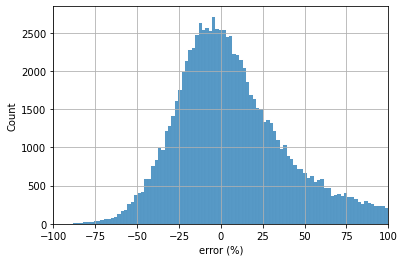

In [197]:
# [★] err의 히스토그램으로 에러율 히스토그램 확인하기
err = (pred - y_test) / y_test * 100
sns.histplot(err)
plt.xlabel('error (%)')
plt.xlim(-100, 100)
plt.grid()

#[★] 에러가 왼쪽으로 치우쳐져 있다: pred < y_test ; underestimate, 음수로 나오지는 않는다는 의미
#오른쪽 꼬리에서는 엄청나게 차이나는 애들이 많은데, 아마 차 값이 쌀 때 많이 나오는듯
#값이 작은데 에러가 크면 페널티를 많이 줌
#skewed gaussian

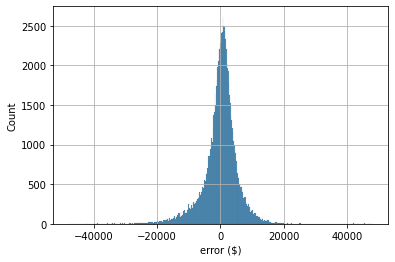

In [198]:
err = (pred - y_test)
sns.histplot(err)
plt.xlabel('error ($)')
plt.grid()
# 에러의 절대값만 비교, laplacian